In [109]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [53]:
water_data = pickle.load(open("water_data_coords.p", "rb"))
veg_path = r"C:\Users\cashe\OneDrive\Desktop\Data Science\Mississippi River analysis\ltrm_vegsrs_data.csv"
veg_data = pd.read_csv(veg_path, low_memory = False)

In [54]:
print(veg_data.columns)
print(veg_data.shape)

Index(['BARCODE', 'ROWNUM', 'PAGENUM', 'FLDNUM', 'PROJCD', 'POOL', 'DATE',
       'LDRCODE', 'RCRDCODE', 'DETRITUS', 'SBSTRATE', 'SITECD', 'MSTRATUM',
       'ASTRATUM', 'RIVMILE', 'VEG_S', 'VEG_RF', 'VEG_E', 'VEG_A', 'VEG_NRF',
       'VEG_U', 'COV_NRF', 'COV_RF', 'COV_E', 'EAST1', 'NORTH1', 'ZONE',
       'ACCUR1', 'METHOD', 'EAST2', 'NORTH2', 'ACCUR2', 'ZONE_U', 'EAST_U',
       'NORTH_U', 'GRIDCODE', 'EAST_15', 'NORTH_15', 'HABITAT1', 'HABITAT2',
       'HABITAT3', 'HABITAT4', 'HABITAT5', 'HABITAT6', 'DEPTH1', 'DEPTH2',
       'DEPTH3', 'DEPTH4', 'DEPTH5', 'DEPTH6', 'DENSITY1', 'DENSITY2',
       'DENSITY3', 'DENSITY4', 'DENSITY5', 'DENSITY6', 'BATCHNUM', 'SPPCD',
       'VISUAL1', 'VISUAL2', 'VISUAL3', 'VISUAL4', 'VISUAL5', 'VISUAL6',
       'RAKE1', 'RAKE2', 'RAKE3', 'RAKE4', 'RAKE5', 'RAKE6', 'ADDSPP',
       'COVSPP', 'QECODE', 'VOUCHER'],
      dtype='object')
(125302, 74)


In [55]:
print(water_data.columns)
print(water_data.shape)

Index(['SHEETBAR', 'FLDNUM', 'DATE', 'TIME', 'NSAMPLES', 'PROJCD', 'LOCATCD',
       'DATABLCK', 'WAVHI', 'WAVEHIQF',
       ...
       'SO4', 'SO4QF', 'HABCLASS', 'INSTCODE', 'LINKBAR', 'RAWNTU', 'RAWNTUQF',
       'CHLcal', 'LATITUDE', 'LONGITUDE'],
      dtype='object', length=133)
(106052, 133)


In [56]:
# Filter each dataset by Open river FLDNUM == 5
water_data = water_data[water_data["FLDNUM"]==5]
veg_data = veg_data[veg_data["FLDNUM"]==5]
print(water_data.shape)
print(veg_data.shape)

(14986, 133)
(0, 74)


In [64]:
sum(water_data["STRATUM"] == 1)

7461

In [65]:
sum(water_data["STRATUM"]==2)

7525

In [7]:
continuous = ['TN','TP','TEMP','DO','TURB','COND','VEL','SS','WDP','CHLcal','SECCHI']

In [10]:
water_data[continuous].describe()

,TN,TP,TEMP,DO,TURB,COND,VEL,SS,WDP,CHLcal,SECCHI
count,5464.000000,5299.000000,13571.000000,13538.000000,13462.000000,13576.000000,4242.000000,13238.000000,13204.000000,13456.000000,13558.000000
mean,2.965641,0.252258,16.560312,8.963488,105.219135,530.267457,0.746528,147.493673,7.041023,17.261624,24.077814
std,1.241985,0.119307,9.446221,2.743366,107.993398,84.976625,0.461052,145.729623,4.080450,12.008246,13.705124
min,-0.200000,-0.001000,0.000000,0.000000,3.000000,168.000000,0.000000,-1.000000,0.000000,-1.000000,1.000000
25%,2.266750,0.182000,12.700000,7.000000,40.000000,467.000000,0.380000,56.800000,4.000000,9.068450,14.000000
50%,2.935000,0.232000,16.900000,8.300000,76.000000,531.500000,0.750000,105.035000,6.500000,14.228590,21.000000
75%,3.548000,0.299000,26.100000,10.200000,125.000000,588.000000,1.080000,184.052500,9.500000,21.847948,31.000000
max,32.965000,3.500000,34.000000,25.000000,1330.000000,989.000000,2.270000,1439.600000,40.200000,151.036340,250.000000


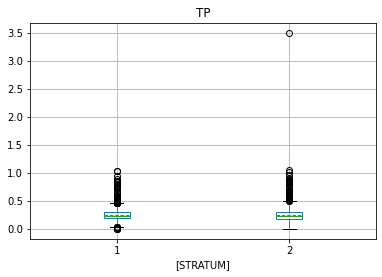

In [132]:
var = "TP"
water_data[[var,'STRATUM']].boxplot(by='STRATUM', meanline=True, showmeans=True, showcaps=True, 
                showbox=True, showfliers=True,return_type = 'axes')
plt.suptitle('') # that's what you're after
plt.show()

Text(0.5, 0.98, 'TP')

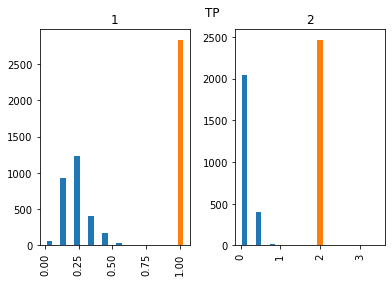

In [133]:
water_data[[var,'STRATUM']].hist(by='STRATUM')
plt.suptitle(var) # that's what you're after